In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
data=datasets.fetch_olivetti_faces()

#1
#print(data.DESCR)
#print(data.target)
#print(data.data)

#2
#plt.imshow(data.images[0],cmap="gray",interpolation="nearest")
#Gray 灰階
#plt.show()

#3把影像變成一列
target=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張照片)，測試資料10張臉(100張圖片)
train=data[target<30]
test=data[target>=30]
#從100張策是影像中，亂數抽5張出來，變數Test的大小變成(5,4096)
n_face= 5
from sklearn.utils import check_random_state
rng = check_random_state(4)

face_ids = rng.randint(test.shape[0],size=(n_face, ))
test = test[face_ids, :]
#把每張訓練影像和測試影像都切格成上下兩部分:X人臉上半部分
n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
#決定預測的演算法 這次用LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),}
y_test_predict = dict()

Automatically created module for IPython interactive environment


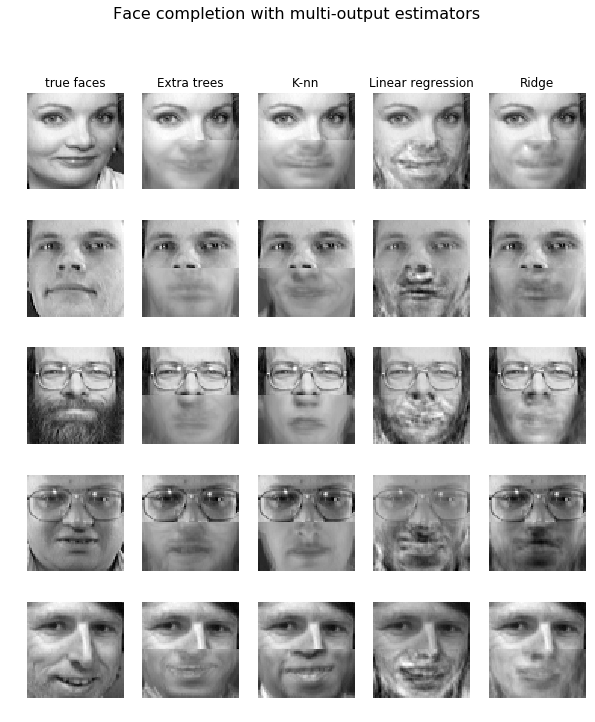

In [7]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target
data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people
# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
# Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()